In [1]:
import numpy as np
import datetime
import os
import pandas as pd

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
todaystring = datetime.date.today().strftime("%y%m%d")

import ModelFitFunctions
from ModelFitFunctions import *

# Set Params

In [2]:
filepath = 'data'

wbefile = 'data/wastewater.csv'

prevfile = 'data/clinical.csv'
namestring = '_qpcr_fits_'
altnamestring = '_qpcr_fits_altend_'
windownamestring = '_qpcr_window_fits_'

catches = ['Stickney','Calumet','OBrien']
prevenddate = {'positive tests':'2022-11-01', 
               'test positivity rate':'2022-04-06', 
               'hospital admissions':'2022-07-15', 
               'Cook County beds in use':'2022-09-20'}
        
fitwwtps = ['comb']
allprev = ['positive tests', 'test positivity rate', 'hospital admissions', 'Cook County beds in use']
trymodels = ['raw_data','only_flow_norm','pmmov_norm','only_bcov_norm','bcov_flow_norm','pmmov_bcov_norm','pmmov_bcov_flow_norm']
whatiscomb = catches
myend = '2021-08-28'
altend = '2021-10-23'
myend2 = '2021-10-23'
altend2 = '2021-10-23'
lags = np.arange(-10,11)
ww_lod = 67

In [3]:
wbe = pd.read_csv(wbefile, parse_dates=['date'])
wbe.rename(columns={'wrp':'catchment','sarscov2':'raw_data'},inplace=True)

prevdf = pd.read_csv(prevfile, parse_dates=['date'])
prevdf.rename(columns={'wrp':'catchment'},inplace=True)

wbe = Fix_wbe(wbe)


In [4]:
prevlagdict,prevbounds = get_prevlags(prevdf,catches,allprev,prevenddate,'2020-08-01','2022-04-01',corthresh=0.00129,wlags=[-2,5],plotcors=False)


Correlating: positive tests test positivity rate
	max lag = 3 	other lags =  [3 4]
	 [0, 10]
 Possible offsets: [[3], [4]]
 wlags = [[-2, 5], [0, 10]]

Correlating: positive tests hospital admissions
	max lag = 2 	other lags =  [2 3]
	 [-1, 9]
Correlating: test positivity rate hospital admissions
	max lag = 1 	other lags =  [0 1]
	 [-1, 9]
 Possible offsets: [[3, 3]]
 wlags = [[-2, 5], [0, 10], [-1, 9]]

Correlating: positive tests Cook County beds in use
	max lag = 9 	other lags =  [ 8  9 10]
	 [5, 16]
Correlating: test positivity rate Cook County beds in use
	max lag = 8 	other lags =  [7 8]
	 [5, 16]
Correlating: hospital admissions Cook County beds in use
	max lag = 7 	other lags =  [6 7]
	 [5, 16]
 Possible offsets: [[3, 3, 10]]
 wlags = [[-2, 5], [0, 10], [-1, 9], [5, 16]]

{'positive tests': 0, 'test positivity rate': 3, 'hospital admissions': 3, 'Cook County beds in use': 10}


,prevind,lower,upper
0,positive tests,-2,5
1,test positivity rate,-3,7
2,hospital admissions,-4,6
3,Cook County beds in use,-5,6


## Train up to 8/28/21, test up to 10/23/21

In [5]:
paramdf,aicdf,pdf,aicfulldf = FitModelParameters(wbe,prevdf,fitwwtps,allprev,trymodels,whatiscomb,myend,lags,ww_lod,prevlagdict,prevenddate,altend=altend)

lag: -10 , catch:  comb
lag: -9 , catch:  comb
lag: -8 , catch:  comb
lag: -7 , catch:  comb
lag: -6 , catch:  comb
lag: -5 , catch:  comb
lag: -4 , catch:  comb
lag: -3 , catch:  comb
lag: -2 , catch:  comb
lag: -1 , catch:  comb
lag: 0 , catch:  comb
lag: 1 , catch:  comb
lag: 2 , catch:  comb
lag: 3 , catch:  comb
lag: 4 , catch:  comb
lag: 5 , catch:  comb
lag: 6 , catch:  comb
lag: 7 , catch:  comb
lag: 8 , catch:  comb
lag: 9 , catch:  comb
lag: 10 , catch:  comb


In [6]:
paramdf.to_csv(os.path.join(filepath,'fitparams'+namestring+todaystring+'.csv'),index=False)
aicdf.to_csv(os.path.join(filepath,'fitaic'+namestring+todaystring+'.csv'),index=False)
aicfulldf.to_csv(os.path.join(filepath,'fitaicfull'+namestring+todaystring+'.csv'),index=False)

In [7]:
print(namestring+todaystring)

_qpcr_fits_240201


## Train up to 10/23, test up to 10/23

In [8]:
paramdf,aicdf,pdf,aicfulldf = FitModelParameters(wbe,prevdf,fitwwtps,allprev,trymodels,whatiscomb,myend2,lags,ww_lod,prevlagdict,prevenddate,altend=altend2)

lag: -10 , catch:  comb
lag: -9 , catch:  comb
lag: -8 , catch:  comb
lag: -7 , catch:  comb
lag: -6 , catch:  comb
lag: -5 , catch:  comb
lag: -4 , catch:  comb
lag: -3 , catch:  comb
lag: -2 , catch:  comb
lag: -1 , catch:  comb
lag: 0 , catch:  comb
lag: 1 , catch:  comb
lag: 2 , catch:  comb
lag: 3 , catch:  comb
lag: 4 , catch:  comb
lag: 5 , catch:  comb
lag: 6 , catch:  comb
lag: 7 , catch:  comb
lag: 8 , catch:  comb
lag: 9 , catch:  comb
lag: 10 , catch:  comb


In [9]:
paramdf.to_csv(os.path.join(filepath,'fitparams'+altnamestring+todaystring+'.csv'),index=False)

In [11]:
print(altnamestring+todaystring)

_qpcr_fits_altend_240201


# Windows

In [12]:
paramdfwindow = pd.DataFrame(columns = ['wwtp','prevind','fit','feature','lag','window','start'])
aicdfwindow = pd.DataFrame(columns = ['wwtp','prevind','fit','lag','window','start'])
for window in [24,28,32,36,40,44,48,52]:
    enddates = [(datetime.datetime.strptime('2020-10-24','%Y-%m-%d').date()+
                 datetime.timedelta(weeks=int(window))).strftime('%Y-%m-%d')]+pd.date_range(end=datetime.datetime.strptime('2021-11-08','%Y-%m-%d').date(), 
                             periods=int(27-window/2),freq='2W-SAT').strftime('%Y-%m-%d').tolist()
    startdates = [(datetime.datetime.strptime(date,'%Y-%m-%d').date()-datetime.timedelta(weeks=int(window))).strftime('%Y-%m-%d') for date in enddates]
#     print(startdates)
#     print('')
#     print(enddates)
    for start,end in zip(startdates,enddates):
        print(window,'\t',start,'\t',end)
        paramdf,aicdf,pdf,aicfulldf = FitModelParameters(wbe[(wbe.date>=start) & (wbe.date<=end)],prevdf,fitwwtps,['hospital admissions'],
                                                         trymodels,whatiscomb,end,lags,ww_lod,prevlagdict,prevenddate)
        paramdf['window'] = window
        paramdf['start'] = start
        paramdf['end'] = end
        aicdf['window'] = window
        aicdf['start'] = start
        aicdf['end'] = end
        paramdfwindow = pd.concat([paramdfwindow,paramdf])
        aicdfwindow = pd.concat([aicdfwindow,aicdf])

24 	 2020-10-24 	 2021-04-10
lag: -10 , catch:  comb
lag: -9 , catch:  comb
lag: -8 , catch:  comb
lag: -7 , catch:  comb
lag: -6 , catch:  comb
lag: -5 , catch:  comb
lag: -4 , catch:  comb
lag: -3 , catch:  comb
lag: -2 , catch:  comb
lag: -1 , catch:  comb
lag: 0 , catch:  comb
lag: 1 , catch:  comb
lag: 2 , catch:  comb
lag: 3 , catch:  comb
lag: 4 , catch:  comb
lag: 5 , catch:  comb
lag: 6 , catch:  comb
lag: 7 , catch:  comb
lag: 8 , catch:  comb
lag: 9 , catch:  comb
lag: 10 , catch:  comb
24 	 2020-11-07 	 2021-04-24
lag: -10 , catch:  comb
lag: -9 , catch:  comb
lag: -8 , catch:  comb
lag: -7 , catch:  comb
lag: -6 , catch:  comb
lag: -5 , catch:  comb
lag: -4 , catch:  comb
lag: -3 , catch:  comb
lag: -2 , catch:  comb
lag: -1 , catch:  comb
lag: 0 , catch:  comb
lag: 1 , catch:  comb
lag: 2 , catch:  comb
lag: 3 , catch:  comb
lag: 4 , catch:  comb
lag: 5 , catch:  comb
lag: 6 , catch:  comb
lag: 7 , catch:  comb
lag: 8 , catch:  comb
lag: 9 , catch:  comb
lag: 10 , catch: 

lag: -5 , catch:  comb
lag: -4 , catch:  comb
lag: -3 , catch:  comb
lag: -2 , catch:  comb
lag: -1 , catch:  comb
lag: 0 , catch:  comb
lag: 1 , catch:  comb
lag: 2 , catch:  comb
lag: 3 , catch:  comb
lag: 4 , catch:  comb
lag: 5 , catch:  comb
lag: 6 , catch:  comb
lag: 7 , catch:  comb
lag: 8 , catch:  comb
lag: 9 , catch:  comb
lag: 10 , catch:  comb
28 	 2020-11-07 	 2021-05-22
lag: -10 , catch:  comb
lag: -9 , catch:  comb
lag: -8 , catch:  comb
lag: -7 , catch:  comb
lag: -6 , catch:  comb
lag: -5 , catch:  comb
lag: -4 , catch:  comb
lag: -3 , catch:  comb
lag: -2 , catch:  comb
lag: -1 , catch:  comb
lag: 0 , catch:  comb
lag: 1 , catch:  comb
lag: 2 , catch:  comb
lag: 3 , catch:  comb
lag: 4 , catch:  comb
lag: 5 , catch:  comb
lag: 6 , catch:  comb
lag: 7 , catch:  comb
lag: 8 , catch:  comb
lag: 9 , catch:  comb
lag: 10 , catch:  comb
28 	 2020-11-21 	 2021-06-05
lag: -10 , catch:  comb
lag: -9 , catch:  comb
lag: -8 , catch:  comb
lag: -7 , catch:  comb
lag: -6 , catch: 

lag: 2 , catch:  comb
lag: 3 , catch:  comb
lag: 4 , catch:  comb
lag: 5 , catch:  comb
lag: 6 , catch:  comb
lag: 7 , catch:  comb
lag: 8 , catch:  comb
lag: 9 , catch:  comb
lag: 10 , catch:  comb
32 	 2020-12-05 	 2021-07-17
lag: -10 , catch:  comb
lag: -9 , catch:  comb
lag: -8 , catch:  comb
lag: -7 , catch:  comb
lag: -6 , catch:  comb
lag: -5 , catch:  comb
lag: -4 , catch:  comb
lag: -3 , catch:  comb
lag: -2 , catch:  comb
lag: -1 , catch:  comb
lag: 0 , catch:  comb
lag: 1 , catch:  comb
lag: 2 , catch:  comb
lag: 3 , catch:  comb
lag: 4 , catch:  comb
lag: 5 , catch:  comb
lag: 6 , catch:  comb
lag: 7 , catch:  comb
lag: 8 , catch:  comb
lag: 9 , catch:  comb
lag: 10 , catch:  comb
32 	 2020-12-19 	 2021-07-31
lag: -10 , catch:  comb
lag: -9 , catch:  comb
lag: -8 , catch:  comb
lag: -7 , catch:  comb
lag: -6 , catch:  comb
lag: -5 , catch:  comb
lag: -4 , catch:  comb
lag: -3 , catch:  comb
lag: -2 , catch:  comb
lag: -1 , catch:  comb
lag: 0 , catch:  comb
lag: 1 , catch: 

lag: 9 , catch:  comb
lag: 10 , catch:  comb
36 	 2021-01-30 	 2021-10-09
lag: -10 , catch:  comb
lag: -9 , catch:  comb
lag: -8 , catch:  comb
lag: -7 , catch:  comb
lag: -6 , catch:  comb
lag: -5 , catch:  comb
lag: -4 , catch:  comb
lag: -3 , catch:  comb
lag: -2 , catch:  comb
lag: -1 , catch:  comb
lag: 0 , catch:  comb
lag: 1 , catch:  comb
lag: 2 , catch:  comb
lag: 3 , catch:  comb
lag: 4 , catch:  comb
lag: 5 , catch:  comb
lag: 6 , catch:  comb
lag: 7 , catch:  comb
lag: 8 , catch:  comb
lag: 9 , catch:  comb
lag: 10 , catch:  comb
36 	 2021-02-13 	 2021-10-23
lag: -10 , catch:  comb
lag: -9 , catch:  comb
lag: -8 , catch:  comb
lag: -7 , catch:  comb
lag: -6 , catch:  comb
lag: -5 , catch:  comb
lag: -4 , catch:  comb
lag: -3 , catch:  comb
lag: -2 , catch:  comb
lag: -1 , catch:  comb
lag: 0 , catch:  comb
lag: 1 , catch:  comb
lag: 2 , catch:  comb
lag: 3 , catch:  comb
lag: 4 , catch:  comb
lag: 5 , catch:  comb
lag: 6 , catch:  comb
lag: 7 , catch:  comb
lag: 8 , catch: 

lag: -6 , catch:  comb
lag: -5 , catch:  comb
lag: -4 , catch:  comb
lag: -3 , catch:  comb
lag: -2 , catch:  comb
lag: -1 , catch:  comb
lag: 0 , catch:  comb
lag: 1 , catch:  comb
lag: 2 , catch:  comb
lag: 3 , catch:  comb
lag: 4 , catch:  comb
lag: 5 , catch:  comb
lag: 6 , catch:  comb
lag: 7 , catch:  comb
lag: 8 , catch:  comb
lag: 9 , catch:  comb
lag: 10 , catch:  comb
48 	 2020-10-24 	 2021-09-25
lag: -10 , catch:  comb
lag: -9 , catch:  comb
lag: -8 , catch:  comb
lag: -7 , catch:  comb
lag: -6 , catch:  comb
lag: -5 , catch:  comb
lag: -4 , catch:  comb
lag: -3 , catch:  comb
lag: -2 , catch:  comb
lag: -1 , catch:  comb
lag: 0 , catch:  comb
lag: 1 , catch:  comb
lag: 2 , catch:  comb
lag: 3 , catch:  comb
lag: 4 , catch:  comb
lag: 5 , catch:  comb
lag: 6 , catch:  comb
lag: 7 , catch:  comb
lag: 8 , catch:  comb
lag: 9 , catch:  comb
lag: 10 , catch:  comb
48 	 2020-11-07 	 2021-10-09
lag: -10 , catch:  comb
lag: -9 , catch:  comb
lag: -8 , catch:  comb
lag: -7 , catch: 

In [14]:
paramdfwindow.to_csv(os.path.join(filepath,'fitparams'+windownamestring+todaystring+'.csv'),index=False)

In [15]:
print(windownamestring+todaystring)

_qpcr_window_fits_240201


#### omit 2 weeks up to 8/28, test to 10/23

In [17]:
paramdfwindowskip = pd.DataFrame(columns = ['wwtp','prevind','fit','feature','lag','window','start'])
aicdfwindowskip = pd.DataFrame(columns = ['wwtp','prevind','fit','lag','window','start'])
aicfulldfwindowskip = pd.DataFrame(columns = ['wwtp','prevind','fit','lag','window','start'])
for window in [2]:
    enddates = pd.date_range(end=datetime.datetime.strptime('2021-08-28','%Y-%m-%d').date(), 
                             periods=int(46-window),freq='1W-SAT').strftime('%Y-%m-%d').tolist()
    startdates = [(datetime.datetime.strptime(date,'%Y-%m-%d').date()-datetime.timedelta(weeks=int(window))).strftime('%Y-%m-%d') for date in enddates]
#     print(startdates)
#     print('')
#     print(enddates)
    for start,end in zip(startdates,enddates):
        print(window,'\t',start,'\t',end)
        paramdf,aicdf,pdf,aicfulldf = FitModelParameters(wbe[((wbe.date<=start) | (wbe.date>=end)) & (wbe.date<'2021-10-23')],prevdf,fitwwtps,['hospital admissions'],
                                                         trymodels,whatiscomb,'2021-08-28',lags,ww_lod,prevlagdict,prevenddate,altend='2021-10-23')
        paramdf['window'] = window
        paramdf['start'] = start
        paramdf['end'] = end
        aicdf['window'] = window
        aicdf['start'] = start
        aicdf['end'] = end
        aicfulldf['window'] = window
        aicfulldf['start'] = start
        aicfulldf['end'] = end
        paramdfwindowskip = pd.concat([paramdfwindowskip,paramdf])
        aicdfwindowskip = pd.concat([aicdfwindowskip,aicdf])        
        aicfulldfwindowskip = pd.concat([aicfulldfwindowskip,aicfulldf])

2 	 2020-10-17 	 2020-10-31
lag: -10 , catch:  comb
lag: -9 , catch:  comb
lag: -8 , catch:  comb
lag: -7 , catch:  comb
lag: -6 , catch:  comb
lag: -5 , catch:  comb
lag: -4 , catch:  comb
lag: -3 , catch:  comb
lag: -2 , catch:  comb
lag: -1 , catch:  comb
lag: 0 , catch:  comb
lag: 1 , catch:  comb
lag: 2 , catch:  comb
lag: 3 , catch:  comb
lag: 4 , catch:  comb
lag: 5 , catch:  comb
lag: 6 , catch:  comb
lag: 7 , catch:  comb
lag: 8 , catch:  comb
lag: 9 , catch:  comb
lag: 10 , catch:  comb
2 	 2020-10-24 	 2020-11-07
lag: -10 , catch:  comb
lag: -9 , catch:  comb
lag: -8 , catch:  comb
lag: -7 , catch:  comb
lag: -6 , catch:  comb
lag: -5 , catch:  comb
lag: -4 , catch:  comb
lag: -3 , catch:  comb
lag: -2 , catch:  comb
lag: -1 , catch:  comb
lag: 0 , catch:  comb
lag: 1 , catch:  comb
lag: 2 , catch:  comb
lag: 3 , catch:  comb
lag: 4 , catch:  comb
lag: 5 , catch:  comb
lag: 6 , catch:  comb
lag: 7 , catch:  comb
lag: 8 , catch:  comb
lag: 9 , catch:  comb
lag: 10 , catch:  c

lag: -4 , catch:  comb
lag: -3 , catch:  comb
lag: -2 , catch:  comb
lag: -1 , catch:  comb
lag: 0 , catch:  comb
lag: 1 , catch:  comb
lag: 2 , catch:  comb
lag: 3 , catch:  comb
lag: 4 , catch:  comb
lag: 5 , catch:  comb
lag: 6 , catch:  comb
lag: 7 , catch:  comb
lag: 8 , catch:  comb
lag: 9 , catch:  comb
lag: 10 , catch:  comb
2 	 2021-02-13 	 2021-02-27
lag: -10 , catch:  comb
lag: -9 , catch:  comb
lag: -8 , catch:  comb
lag: -7 , catch:  comb
lag: -6 , catch:  comb
lag: -5 , catch:  comb
lag: -4 , catch:  comb
lag: -3 , catch:  comb
lag: -2 , catch:  comb
lag: -1 , catch:  comb
lag: 0 , catch:  comb
lag: 1 , catch:  comb
lag: 2 , catch:  comb
lag: 3 , catch:  comb
lag: 4 , catch:  comb
lag: 5 , catch:  comb
lag: 6 , catch:  comb
lag: 7 , catch:  comb
lag: 8 , catch:  comb
lag: 9 , catch:  comb
lag: 10 , catch:  comb
2 	 2021-02-20 	 2021-03-06
lag: -10 , catch:  comb
lag: -9 , catch:  comb
lag: -8 , catch:  comb
lag: -7 , catch:  comb
lag: -6 , catch:  comb
lag: -5 , catch:  c

lag: 4 , catch:  comb
lag: 5 , catch:  comb
lag: 6 , catch:  comb
lag: 7 , catch:  comb
lag: 8 , catch:  comb
lag: 9 , catch:  comb
lag: 10 , catch:  comb
2 	 2021-06-05 	 2021-06-19
lag: -10 , catch:  comb
lag: -9 , catch:  comb
lag: -8 , catch:  comb
lag: -7 , catch:  comb
lag: -6 , catch:  comb
lag: -5 , catch:  comb
lag: -4 , catch:  comb
lag: -3 , catch:  comb
lag: -2 , catch:  comb
lag: -1 , catch:  comb
lag: 0 , catch:  comb
lag: 1 , catch:  comb
lag: 2 , catch:  comb
lag: 3 , catch:  comb
lag: 4 , catch:  comb
lag: 5 , catch:  comb
lag: 6 , catch:  comb
lag: 7 , catch:  comb
lag: 8 , catch:  comb
lag: 9 , catch:  comb
lag: 10 , catch:  comb
2 	 2021-06-12 	 2021-06-26
lag: -10 , catch:  comb
lag: -9 , catch:  comb
lag: -8 , catch:  comb
lag: -7 , catch:  comb
lag: -6 , catch:  comb
lag: -5 , catch:  comb
lag: -4 , catch:  comb
lag: -3 , catch:  comb
lag: -2 , catch:  comb
lag: -1 , catch:  comb
lag: 0 , catch:  comb
lag: 1 , catch:  comb
lag: 2 , catch:  comb
lag: 3 , catch:  c

In [22]:
paramdfwindowskip.to_csv(os.path.join(filepath,'fitparams'+windownamestring+'skipped_end8_28_'+todaystring+'.csv'),index=False)
aicdfwindowskip.to_csv(os.path.join(filepath,'fitaic'+windownamestring+'skipped_end8_28_'+todaystring+'.csv'),index=False)

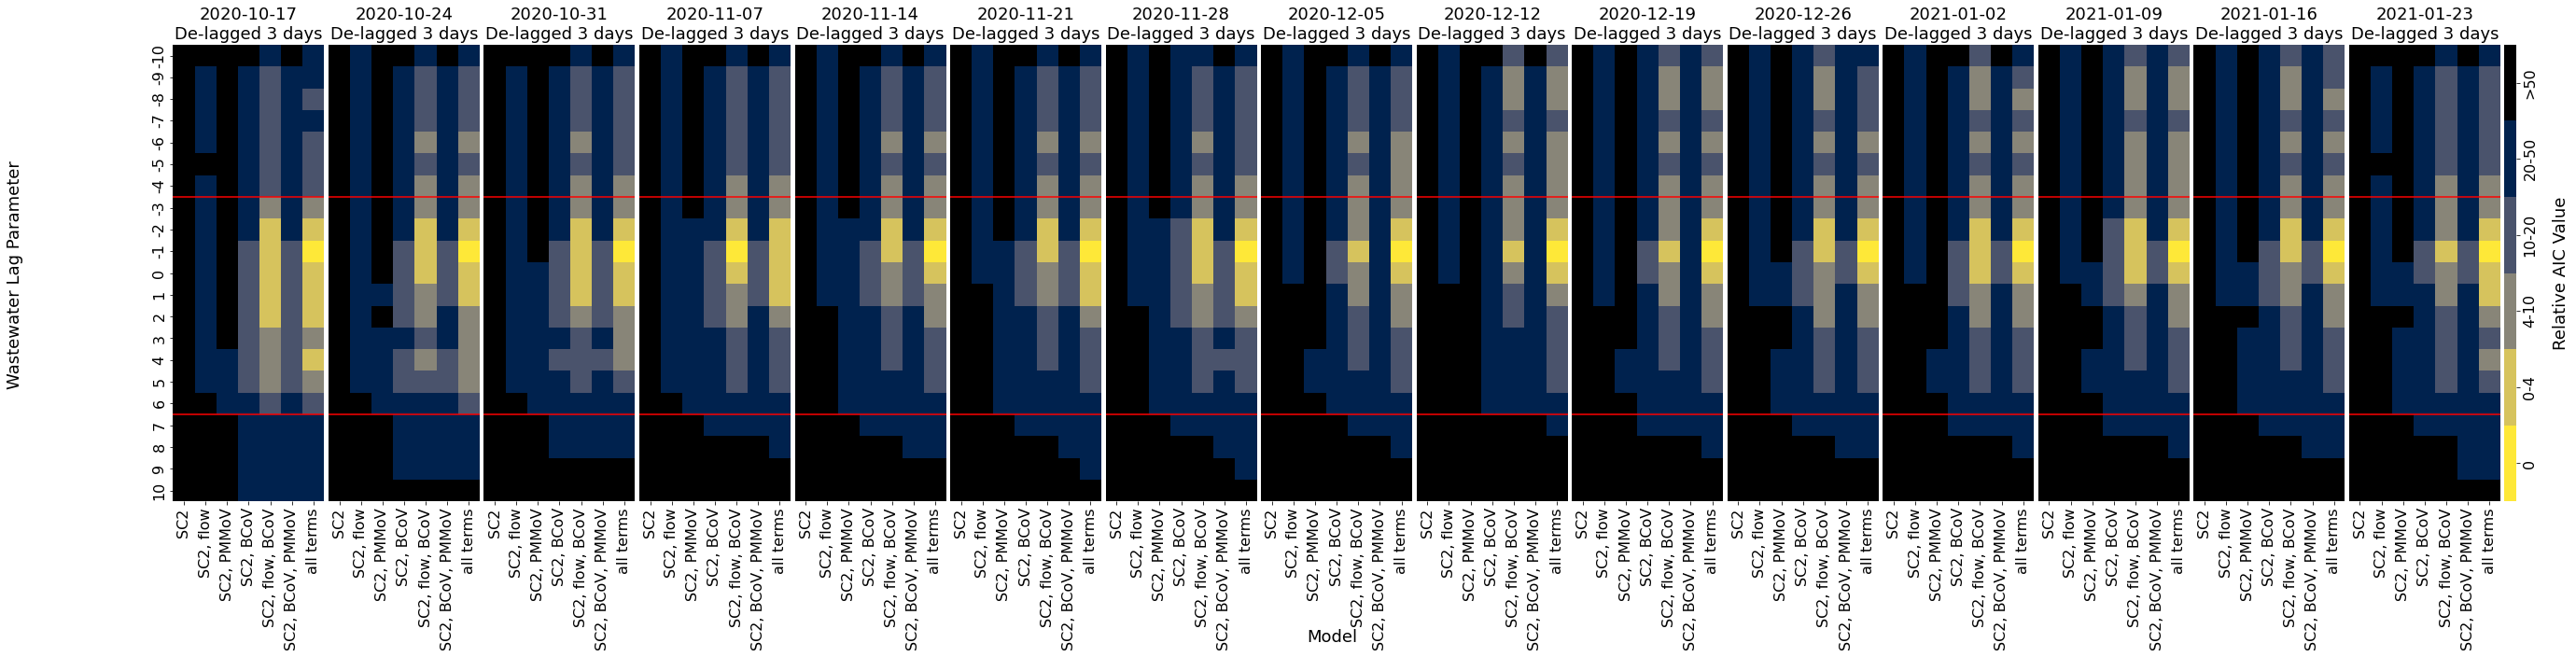

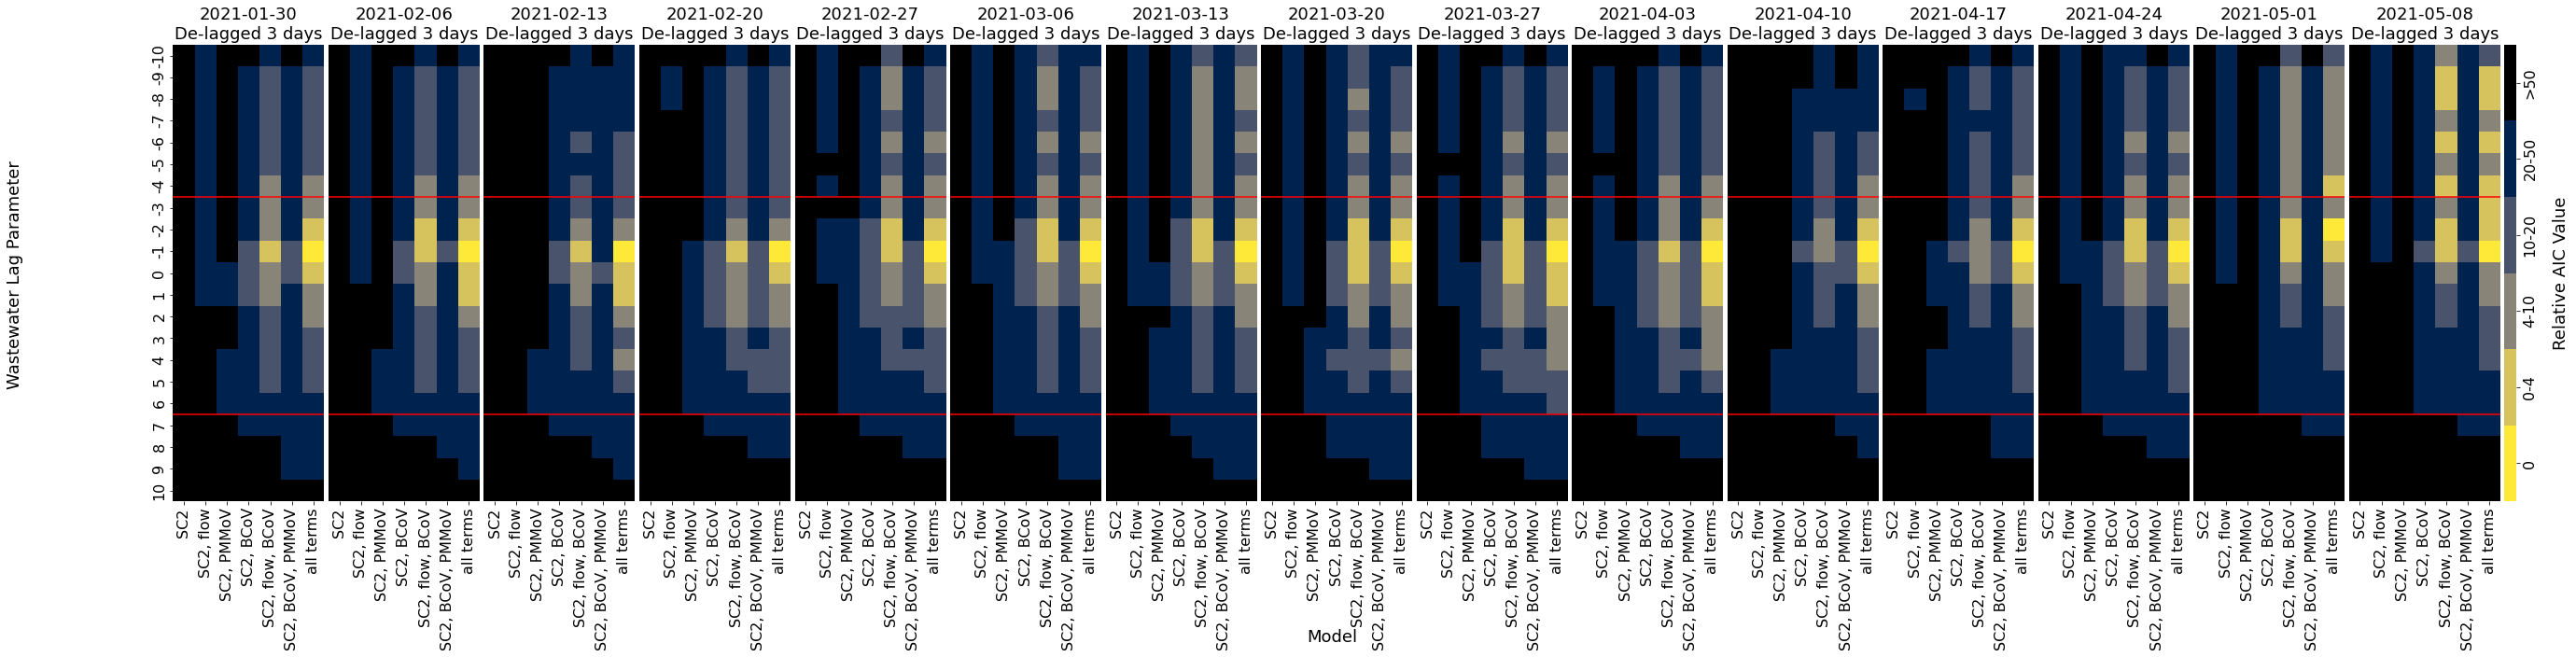

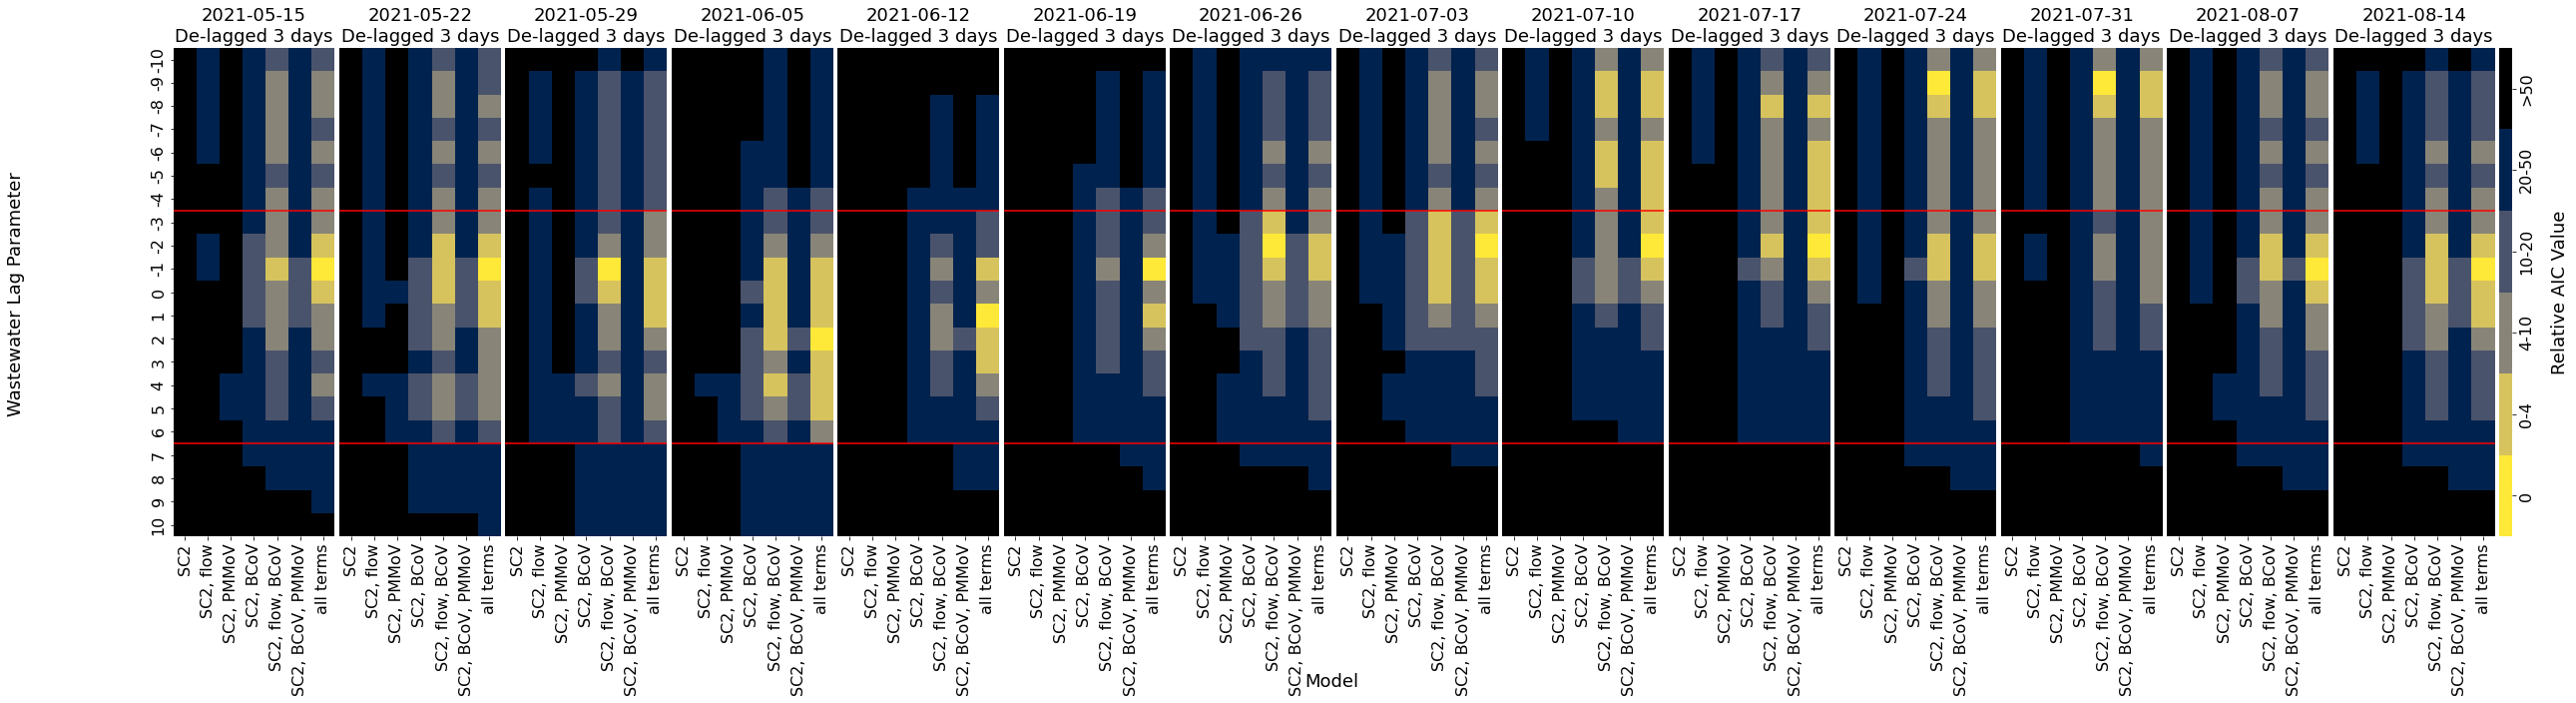

In [21]:
aic2,param2,models = reformat_aic_params(aicdfwindowskip,paramdfwindowskip,trymodels)
windows = 2
aicprevs = aic2[aic2.window==windows].start.unique().tolist()
aic_heatmap_single(aic2[(aic2.window==windows)].drop(columns={'prevind'}).rename(columns={'start':'prevind'}),models,'comb',
                   aicprevs[:15],pd.DataFrame({'prevind':aicprevs,'lower':-3,'upper':6}),{date:3 for date in aicprevs},fs1=16,fs2=18)
aic_heatmap_single(aic2[aic2.window==windows].drop(columns={'prevind'}).rename(columns={'start':'prevind'}),models,'comb',
                   aicprevs[15:30],pd.DataFrame({'prevind':aicprevs,'lower':-3,'upper':6}),{date:3 for date in aicprevs},fs1=16,fs2=18)
aic_heatmap_single(aic2[aic2.window==windows].drop(columns={'prevind'}).rename(columns={'start':'prevind'}),models,'comb',
                   aicprevs[30:],pd.DataFrame({'prevind':aicprevs,'lower':-3,'upper':6}),{date:3 for date in aicprevs},fs1=16,fs2=18)